<b>Machine Learning Exercise session: 19th SEPTEMBER 2025</b>

# <b>Working with: Bayes Classifier and K-nearest Neighbors</b>

Welcome to this week's exercise session. This notebook will take you through: 
- Understanding Bayes Classifier decision rule
- K-nearest Neighbors

Remember 
- It is good practice to use the Machine Learning python environment you made in week 1.
- Solving these exercises are supposed to take much longer than 90 minutes. Work on them before going to class.
- Learning Machine Learning is challenging. Take your time, make some errors, read documentation if needed. <b>We are happy to help if you are stuck.</b>

Have fun! 

# <b>Exploring theoretical background</b>

### Exercise t1

Explain why the Bayes classifier assigns an observation to the class with the highest posterior probability.


In [17]:
# Your solution here...
""" 
Because its more likeli to be that class, since its posterior probability is highest.

"""

### Exercise t2

Two classes $C_1$ and $C_2$ with feature $x \in \mathbb{R}$:

$$
P(x \mid C_1) = \mathcal{N}(x \mid 0, 1), \quad P(x \mid C_2) = \mathcal{N}(x \mid 2, 1)
$$

Priors:  

$$
P(C_1) = 0.5, \quad P(C_2) = 0.5
$$
  

1. Compute the Bayes classifier decision rule.  
2. Find the decision boundary $x^*$. This is the value(s) of $x$ where the Bayes classifier is indifferent between $C_1$ and $C_2$, meaning

$$
P(C_1 \mid x) = P(C_2 \mid x).
$$
3. Sketch the class-conditional distributions and indicate the decision boundary. Shade the regions classified as $C_1$ and $C_2$.  

In [18]:
# Your solution here...
""" 
P(Ck) = 0.5 we assume both classes occur with equal probability? Our Bayes classifier decision rule would be argmax(P(x given Ck))

The decision boundary would be at x=1, where if less than 1 it would be assigned to C1 and if more than 1 assigned to C2

"""

### Exercise t3

In this case the class conditionals for the two classes are the same as previous exercise t2, but this time the priors are:

$$
P(C_1) = 0.7, \quad P(C_2) = 0.3
$$


1. What is the Bayes classifier decision rule? 
2. Find the new decision boundary $x^*$.  
3. Sketch the class-conditional distributions and indicate the new decision boundary.  
4. Explain how the prior affects the decision boundary. 

In [20]:
# Your solution here...

""" 
The decision would be taking the maximum posterior probability to the class given the features.

P(c1)P(x given c1)=P(c2)P(x given c2)
Plugging in gaussian.
0.7*exp(-x^2/2)=0.3*exp((x-2)^2/2)
ln * 0.7-x^2/2 = ln*0.3-(x-2)^2/2
x^2-(x-2)^2=-2ln0.7+2ln0.3=2ln0.7/0.3

expanding(x-2)^2
x^2-(x^2-4x+4)=2ln0.7/0.3
4x-4=2ln0.7/0.3
x=1+1/2ln0.7/0.3

approximating ln0.7/0.3 = 0.847
x=1+0.847/2=1.423


This means the decision boundary moves from 1 to 1.423, meaning C1 gets a bigger area and we shrink C2.
"""

### Exercise t4

Suppose two classes have same class conditional $P(x \mid C_i)$ but priors
$P(C_1)=0.9$ and $P(C_2)=0.1$. What will the Bayes classifier predict most of the time? 

In [22]:
# Your solution here...
"""
If both classes have the same class conditional, the one with higher prior will lead to more classification.

We remember the posterior unnormalized to P(Ci)*P(x given Ci)

"""

### Exercise t5

a) Why is KNN an approximation of Bayes classifier?

b) Discuss how the choice of $K$ affects bias and variance in KNN. 

c) Consider a dataset with two well-separated classes. What would be the effect of choosing $K=1$ vs $K=n$?


In [23]:
# Your solution here...

"""
KNN is an approximation of Bayes due to how we use likelihood and probability to decided if a point belong to a class depending on K
Picking the class with highest probability. Majority of vote = posterior probability.


The higher the K the more bias we have, but less variance. Its because K approaches a linear boundary. Where as small K indicate high variance
but low bias.

If the classes are well seperated K=1 would work fine, as it will assign it to the closes point which would be the class.


"""

# <b>Applying what you learned</b>

### Documentation


- sklearn : https://sklearn.org/stable/getting_started.html

- knn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- model_selection : https://sklearn.org/stable/api/sklearn.model_selection.html

- metrics : https://scikit-learn.org/stable/api/sklearn.metrics.html

- preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html

In [1]:
# You might need to import more to solve the exercises

import numpy as np
from pandas import read_csv, DataFrame

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd
import random
import seaborn as sns
from scipy.stats import norm

from sklearn.metrics import make_scorer, accuracy_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### The dataset

The provided dataset $Wine.csv$ is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. There are three different classes of wine, with respective quantities of 13 constituents found in each of them. 

You will try to classify the class of wine implementing a K-nearest Neighbors model.

In [4]:
data = pd.read_csv('Wine.csv')

col_names = [
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

data.columns = col_names
print('Number of obervations: ', len(data))
data.head()

Number of obervations:  177


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### Exercise a1

Start by performing an exploratory analysis of the dataset:

1) Visualize the distribution of the target classes.

2) Inspect which features might be most useful to include in a k-NN classifier (hint: pairplots may help).


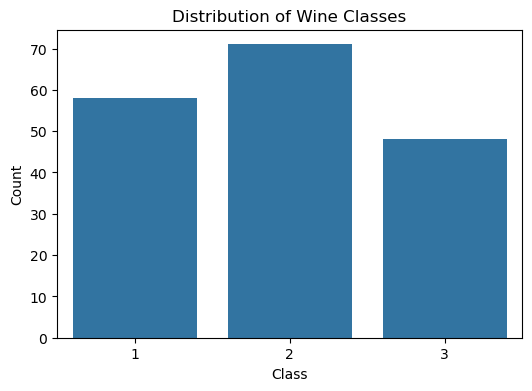

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Wine Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

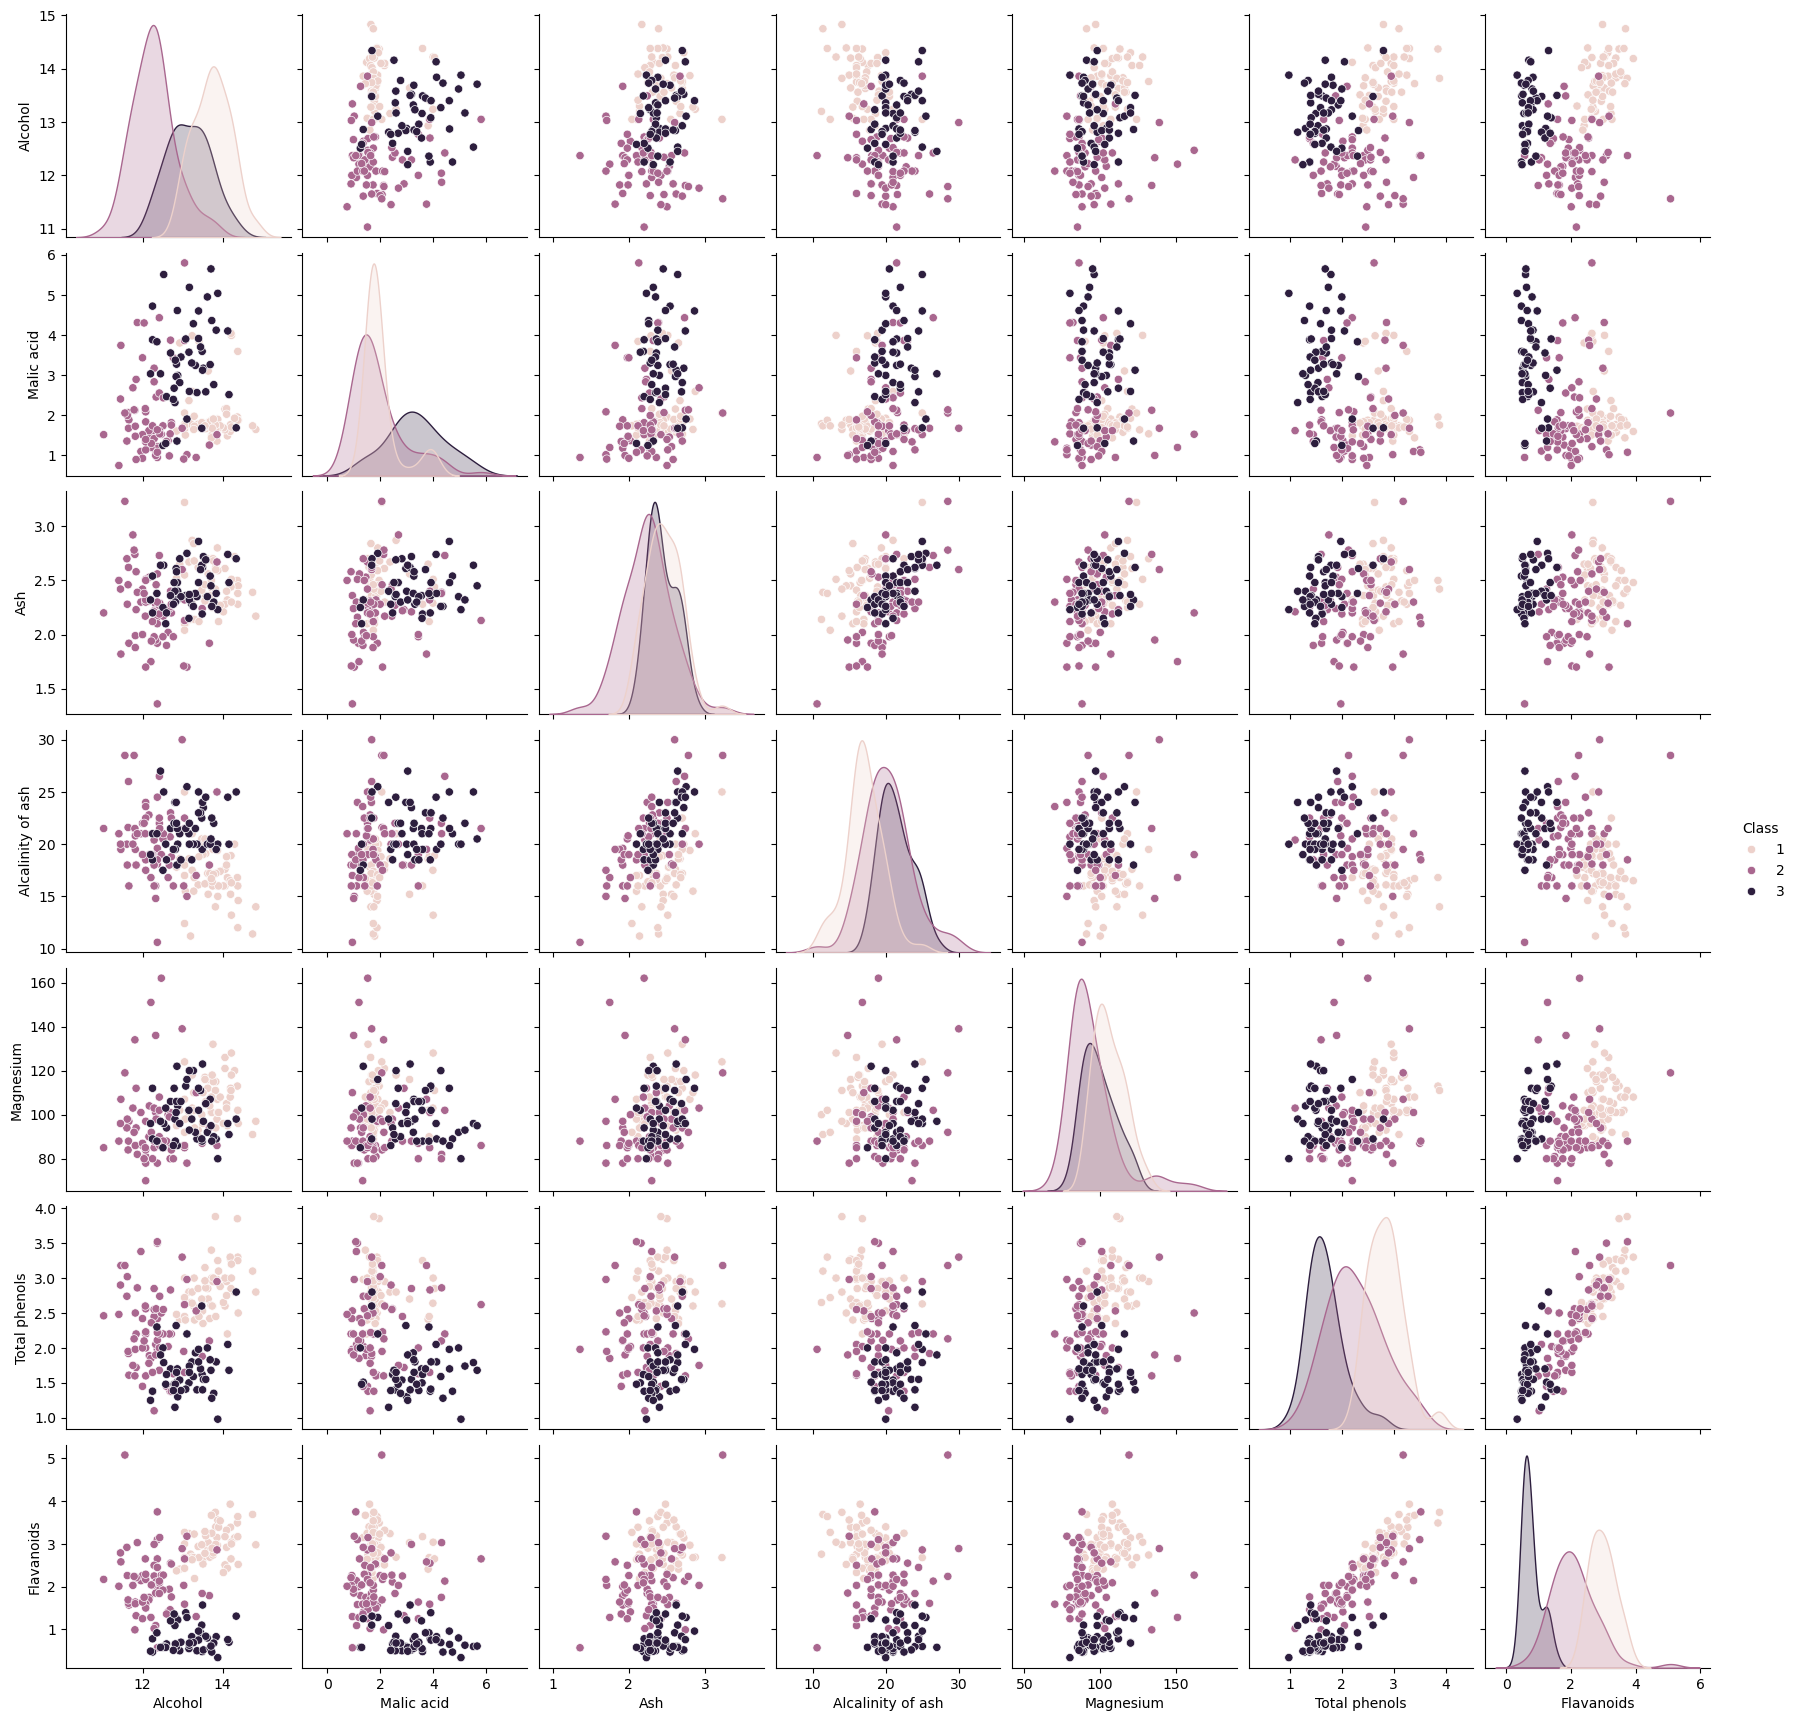

In [13]:
# Your solution here...
sns.pairplot(data, hue='Class', vars=[
    "Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
    "Magnesium", "Total phenols", "Flavanoids"
])
plt.show()

### Exercise a2

Restrict the dataset to only the first two features (Alcohol and Malic acid).

Using a 5-nearest neighbors approach, compute the estimated posterior distribution of classes for a new observation ($x_1$=13 ; $x_2$=2.5).

In [21]:
# Your solution here...
from sklearn.neighbors import KNeighborsClassifier
data_2 = data[["Alcohol", "Malic acid"]]
target = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(data_2, target, test_size=0.25)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Exercise a3

1) Fit a KNN model (k=5) using scikit-learn. Compare its prediction results with those obtained in a2.

2) Fit another KNN with k=10.

3) Visualize and compare both classifiers by plotting their decision regions in the 2D feature space.

In [95]:
# Your solution here...

### Exercise a4

1) Perform model selection by finding the optimal value of k, via cross-validation.

2) Plot the classification error (or MSE) vs. k, and relate with bias variance trade-off. 

3) Report the final model performance.

In [101]:
# Your solution here...

# <b>Exploring what you learned</b>

### Exercise e1

You are designing a binary disease screen. Let class $C_2$ be “disease” and $C_1$ be “healthy”. The disease prior is $P(C_2)=0.05$.  

1. We make the decision of define a false negative (missed disease) 10 times more costly than a false positive. Write a loss matrix consistent with the statement.  
2. Derive the decision rule that minimizes expected posterior loss: the rule that maps $p \equiv P(C_2 \mid x)$ to a predicted class.  
3. Compute the posterior threshold $p^*$ such that you predict “disease” iff $p \ge p^*$. Compare this to the standard Bayes threshold under 0–1 loss. Interpret the result in words.


In [ ]:
# Your solution here...

### Exercise e2

We will test the effect of using or not using the loss matrix.

1. Generate a synthetic dataset with N examples. Use class conditionals: 

   $$
   x \mid C_1 \sim \mathcal N(0,1), \qquad
   x \mid C_2 \sim \mathcal N(2,1),
   $$
   with prior $P(C_2)=0.05$. Compute the exact posterior $p(x) = P(C_2 \mid x)$ using Bayes’ rule with Gaussian densities.

2. Implement two classifiers:
   - 0–1 loss rule: predict disease if $p(x) \ge 0.5$.
   - Asymmetric-loss rule: use your $p^*$ from previous exercise.

   Compare confusion matrices, false negative/positive counts, and expected loss per sample for the two rules. Plot the posterior distribution and show both thresholds.

3. Discuss what changed when you used the loss matrix, and whether using the loss matrix had upsides/drawbacks.


#### Documentation

Confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
# Your solution here...